In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Chapter4_Geologic_DataSet.xlsx to Chapter4_Geologic_DataSet.xlsx


In [3]:
df = pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


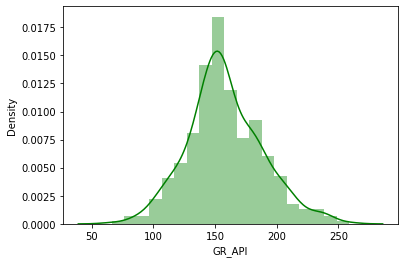

In [4]:
sns.distplot(df['GR_API'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


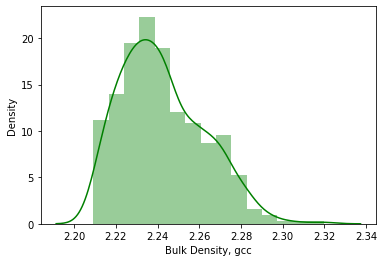

In [6]:
sns.distplot(df['Bulk Density, gcc'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


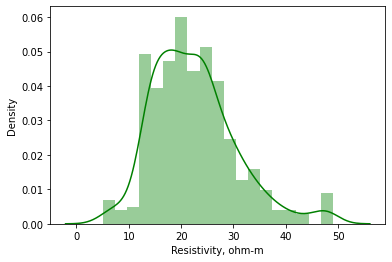

In [7]:
sns.distplot(df['Resistivity, ohm-m'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


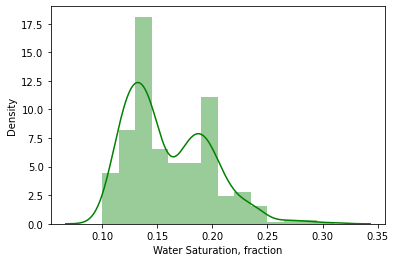

In [8]:
sns.distplot(df['Water Saturation, fraction'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


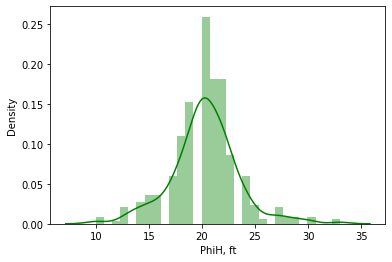

In [9]:
sns.distplot(df['PhiH, ft'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


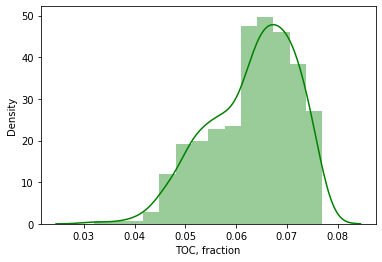

In [10]:
sns.distplot(df['TOC, fraction'],label='Clustering Data',norm_hist=True, color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


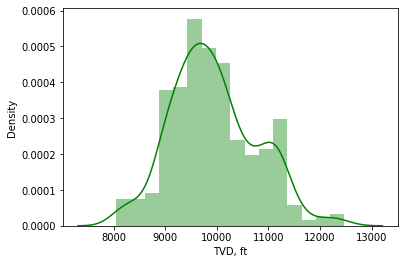

In [11]:
sns.distplot(df['TVD, ft'],label='Clustering Data',norm_hist=True, color='g')

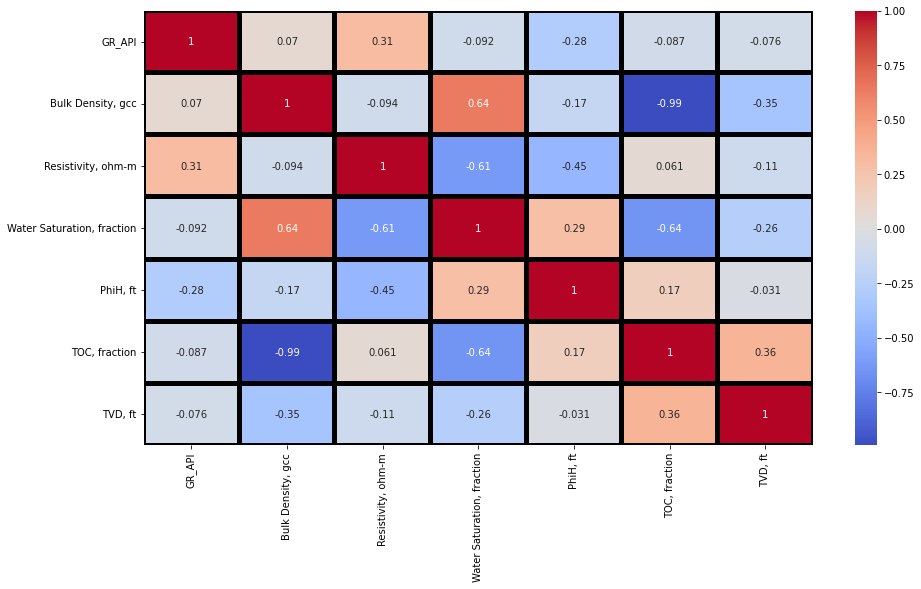

In [12]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=4, linecolor='black')

In [13]:
df.drop(['TOC, fraction'], axis=1, inplace=True)

In [14]:
df

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,118,2.2096,23,0.13,23,10670
1,170,2.2185,21,0.17,20,9932
2,166,2.2260,14,0.20,21,9747
3,166,2.2260,14,0.20,21,9747
4,135,2.2303,22,0.16,24,9222
...,...,...,...,...,...,...
433,123,2.2307,24,0.14,22,9605
434,141,2.2598,20,0.20,19,10086
435,157,2.2616,20,0.17,18,9008
436,142,2.2523,14,0.21,22,10397


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

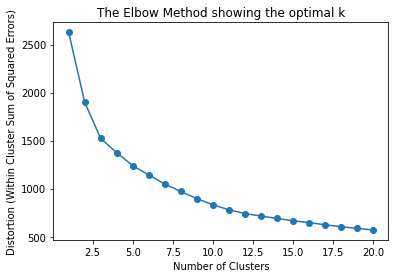

In [16]:
import matplotlib.pyplot as plt
distortions=[]
for i in range (1,21):
    km=KMeans(n_clusters=i,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
    km.fit(df_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

In [17]:
n=10
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[ 0.87076866 -0.97883879  0.38000873 -0.77891073  0.23635858  0.60510785]
 [-0.43702597  0.55465562 -0.72948387  0.94387715  2.20250797 -0.35747435]
 [ 0.29039347  0.14795517  1.23604241 -0.59641123 -0.70048503 -0.74714425]
 [-0.95362352 -0.86282759 -0.28015421 -0.74253719 -0.01187808  1.51891269]
 [-0.11678936 -0.20043572 -0.82697437  0.63429846  0.19583089 -0.31751012]
 [ 1.49714297  1.42135886  2.61809734 -0.89343335 -2.06295198 -0.64341298]
 [ 0.93027358  1.88836765 -0.92867931  2.10656149  0.29341464 -0.76343302]
 [-0.81376234 -0.84668052  0.35502005 -0.76527708  0.34691776 -0.3705674 ]
 [-0.63019609  1.182783   -0.5776426   0.96478859 -0.16489011 -0.19384786]
 [ 1.92616794 -0.13674153  0.3616604  -0.65224177 -1.43076904  0.83668123]]


In [18]:
labels=kmeans.labels_
labels

array([3, 4, 4, 4, 7, 1, 5, 7, 0, 0, 8, 1, 8, 8, 0, 2, 3, 8, 3, 2, 2, 7,
       3, 9, 2, 4, 1, 4, 3, 4, 6, 8, 0, 8, 4, 6, 2, 0, 7, 1, 1, 8, 8, 4,
       2, 1, 9, 2, 3, 8, 2, 2, 7, 7, 7, 9, 3, 7, 0, 8, 4, 7, 3, 1, 4, 0,
       3, 5, 5, 0, 4, 4, 3, 7, 9, 5, 3, 8, 6, 2, 1, 4, 0, 0, 0, 3, 1, 8,
       2, 7, 2, 5, 3, 0, 0, 8, 8, 8, 8, 8, 1, 0, 0, 7, 4, 1, 7, 7, 6, 1,
       1, 9, 7, 7, 7, 2, 3, 9, 0, 2, 1, 8, 4, 0, 4, 2, 4, 2, 2, 0, 7, 2,
       1, 4, 2, 7, 8, 2, 3, 9, 3, 9, 6, 7, 4, 4, 3, 2, 1, 7, 8, 3, 8, 1,
       9, 7, 2, 3, 4, 2, 6, 0, 3, 2, 5, 4, 6, 1, 3, 2, 7, 4, 2, 8, 8, 4,
       3, 7, 3, 0, 3, 7, 6, 2, 8, 1, 1, 8, 4, 4, 8, 4, 3, 7, 4, 6, 6, 9,
       3, 5, 3, 5, 7, 0, 2, 2, 3, 3, 0, 3, 2, 2, 6, 7, 8, 4, 4, 8, 4, 2,
       8, 8, 8, 8, 1, 2, 2, 5, 6, 6, 6, 7, 0, 0, 3, 0, 4, 3, 4, 4, 2, 0,
       2, 5, 2, 6, 4, 4, 8, 4, 3, 9, 5, 2, 0, 0, 8, 4, 4, 8, 4, 4, 4, 4,
       8, 8, 0, 7, 0, 7, 2, 4, 4, 8, 4, 1, 3, 9, 7, 3, 4, 3, 4, 6, 2, 8,
       8, 1, 6, 1, 3, 3, 2, 9, 7, 0, 4, 4, 2, 2, 2,

In [19]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels

In [20]:
df_scaled

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft",Clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564,3
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779,4
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267,7
...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,-0.399167,7
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,0.182428,8
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-1.121022,8
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,0.558470,8


Text(0.5, 0, 'silhouette coefficient')

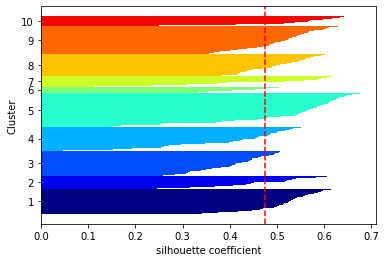

In [21]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

In [22]:
df_scaled['GR_API']=(df_scaled['GR_API']*(df['GR_API'].std())+df['GR_API'].mean())
df_scaled['Bulk Density, gcc']=(df_scaled['Bulk Density, gcc']*(df['Bulk Density, gcc'].std())+df['Bulk Density, gcc'].mean())
df_scaled['Resistivity, ohm-m']=(df_scaled['Resistivity, ohm-m']*(df['Resistivity, ohm-m'].std())+df['Resistivity, ohm-m'].mean())
df_scaled['Water Saturation, fraction']=(df_scaled['Water Saturation, fraction']*(df['Water Saturation, fraction'].std())+df['Water Saturation, fraction'].mean())
df_scaled['PhiH, ft']=(df_scaled['PhiH, ft']*(df['PhiH, ft'].std())+df['PhiH, ft'].mean())
df_scaled['TVD, ft']=(df_scaled['TVD, ft']*(df['TVD, ft'].std())+df['TVD, ft'].mean())

In [23]:
Group_by=df_scaled.groupby(by='Clusters').mean()
Group_by

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,184.440947,2.222710,25.467746,0.130681,21.036575,10436.143694
1,144.688531,2.253346,16.622987,0.195226,27.304316,9639.143409
2,166.799556,2.245221,32.291957,0.137518,18.050081,9316.503934
3,128.985759,2.225027,20.204996,0.132044,20.245240,11192.757228
4,154.422612,2.238261,15.845803,0.183627,20.907380,9672.233056
5,203.480551,2.270661,43.309553,0.126390,13.706774,9402.391509
6,186.249690,2.279991,15.035022,0.238786,21.218460,9303.017133
7,133.237053,2.225350,25.268539,0.131192,21.389018,9628.302607
8,138.816830,2.265895,17.833450,0.196009,19.757464,9774.623125


In [24]:
df_scaled.groupby(by='Clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,56,56,56,56,56,56
1,27,27,27,27,27,27
2,57,57,57,57,57,57
3,53,53,53,53,53,53
4,75,75,75,75,75,75
5,14,14,14,14,14,14
6,23,23,23,23,23,23
7,49,49,49,49,49,49
8,62,62,62,62,62,62


In [25]:
df_scaled.to_csv('KM.csv')